# general imports

In [188]:
import pandas as pd

In [189]:
!pip3 install xlrd

In [190]:
df = pd.read_excel("GSAF5.xls")

# Exploratary Data Analysis:

In [191]:
#check for count of rows and colums.
df.shape

(6992, 23)

In [192]:
# check what columns does this DF have.
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [193]:
# check how many duplicated rows is there.
df.duplicated().sum()

0

In [194]:
# use .iloc to take all the rows and 0:15 columns, save it in a new variable.
df = df.iloc[:, 0:15] 
print(df.columns)

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source'],
      dtype='object')


In [195]:
# check how many duplicates are in the new DF.
df.duplicated().sum()

1

In [196]:
# locate the duplicated row.
df[df.duplicated()]

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
5366,Fall 1943,1943.0,Unprovoked,USA,Hawaii,"Midway Island, Northwestern Hawaiian Islands",Spearfishing,2 males,M,NaN,Calf nipped in each case,N,NaN,"""small sharks""",W. M. Chapman


In [197]:
# drop this duplicated row, check whether it took effect.
df.drop_duplicates(inplace = True)

In [198]:
# check which columns have NaN values and deep dive into each of them.
df.isna().sum()

Date            0
Year            2
Type           18
Country        50
State         482
Location      565
Activity      585
Name          219
Sex           579
Age          2993
Injury         35
Fatal Y/N     561
Time         3525
Species      3132
Source         19
dtype: int64

In [199]:
# check the data types of the columns and see whether they make sense.
df.dtypes

Date          object
Year         float64
Type          object
Country       object
State         object
Location      object
Activity      object
Name          object
Sex           object
Age           object
Injury        object
Fatal Y/N     object
Time          object
Species       object
Source        object
dtype: object

# Year column

In [200]:
# 1) current data type is float, it should be integer or string or category depends on the purpose of the analysis.
# 2) for now, fill all the NaNs with mean...?
df['Year'] = df['Year'].fillna(df['Year'].mean())

In [201]:
# Column "Activity":
# 1) check how many unique values in this column.
print(df.Activity.nunique())
print(df["Activity"].value_counts())
print(df["Activity"].isnull().sum())

1598
Activity
Surfing                                                     1132
Swimming                                                     986
Fishing                                                      489
Spearfishing                                                 386
Wading                                                       177
                                                            ... 
Swimming underwater from crayfish cage to a fishing bait       1
Ferry capsized                                                 1
Attempting to drag hooked shark ashore by its tail             1
Diving & force-feeding the shark                               1
Wreck of  large double sailing canoe                           1
Name: count, Length: 1598, dtype: int64
585


In [202]:
# Column "Activity":
# 2) use Regex and .map() to categorize them.
import re
def categorize_activity(activity):
    activity = str(activity).lower()  # Convert to lowercase for uniformity
    
    if re.search(r'surf|bodyboard', activity):
        return 'Surfing'
    elif re.search(r'swim|wading|diving', activity):
        return 'Swimming'
    elif re.search(r'fish|spearfish', activity):
        return 'Fishing'
    elif re.search(r'boat|ferry|capsized|canoe|kayak', activity):
        return 'Boating'
    elif re.search(r'wash|bath', activity):
        return 'Bathing'
    elif re.search(r'dive|diving', activity):
        return 'Diving'
    else:
        return 'Other'
df["Activity"] = df["Activity"].apply(categorize_activity)
df["Activity"].unique()

array(['Bathing', 'Surfing', 'Swimming', 'Fishing', 'Other', 'Boating',
       'Diving'], dtype=object)

# Species column

In [203]:
# species data cleaning
# rename column
df.rename(columns={"Species ": "Species"}, inplace=True)

# CHECK 20 most frequent values
df["Species"].value_counts().head(20)

Species
White shark                                           194
Shark involvement prior to death was not confirmed    105
Invalid                                               102
Shark involvement not confirmed                        92
Tiger shark                                            89
Bull shark                                             70
Shark involvement prior to death unconfirmed           68
6' shark                                               43
4' shark                                               43
Questionable incident                                  35
1.8 m [6'] shark                                       35
Questionable                                           34
1.5 m [5'] shark                                       32
5' shark                                               29
1.2 m [4'] shark                                       27
3' shark                                               27
Wobbegong shark                                        27
4' to 

In [204]:
# CHECK null values amount
df["Species"].isna().sum()

3132

In [205]:
# CHECK total uniques
df["Species"].nunique()

1706

In [206]:
# Replace 'nan' object (string) and other useless data with rean NaN
df["Species"] = df["Species"].replace([
    "nan", 
    "NaN", 
    "NAN", 
    "invalid",
    "shark involvement prior to death was not confirmed",
    "shark involvement not confirmed",
    "shark involvement prior to death unconfirmed",
    "questionable incident",
    "questionable"
], float("nan"))


In [207]:
# lowercase and trim
df["Species"] = df["Species"].str.lower().str.strip()

In [208]:
# set NaN values to "Unknown"
df["Species"].fillna("Unknown", inplace=True)
df.head(100)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,Minor bite to lower body,N,1711hrs,not stated,Bob Myatt GSAF
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,None - chunk of surfboard bitten out,N,1600hrs,bronze whaler,Bob Myatt GSAF
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Swimming,Male not stated was a dive tour worker,M,23,Bitten on the arm,N,1340hrs,not stated,Kevin McMurray Trackingsharks.com
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Fishing,Robert Cuewapuru,M,40,Severe arm injury and delay in medical treatme...,Y,1615hr,reportedly tiger or bull shark,Johannes Marchand Todd Smith
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,Body not recovered,Y,1710hr,great white shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21 Aug-2023,2023.0,Questionable,BAHAMAS,New Providence Isoad,"Saunders Beach, Nassau",Other,male,M,20/30,Body found with shark bites. Possible drowning...,NaN,Morning,Unknown,"The Tribune, 8/21/2023"
96,16 Aug-2023,2023.0,Unprovoked,SPAIN,Valencia,Rabdells Beach,Swimming,male,M,35,Minor lacerations to right foot,N,Afternoon,blue shark,Las Provincias
97,16 Aug-2023,2023.0,Provoked,PORTUGAL,Norte,9 nm off Vila do Conde,Fishing,male,M,NaN,Leg bitten,N,19h30,blue shark,"Portugese Resident, 8/17/2023"
98,12 Aug-2023,2023.0,Unprovoked,SAMOA,Savai'i island,Lano,Other,Amoni Malaeulu,M,NaN,FATAL,Y,Evening,Unknown,"Samoa News,8/15/2023"


In [209]:
# order A-Z unique values for duplicities -> yay! :)
unique_species = sorted(df["Species"].unique())
for species in unique_species:
    print(species)


"a 2' (0.6 m) brown shark"
"a black-tipped shark"
"a blue shark"
"a dog shark"
"a large shark"
"a little shark"
"a long thin brown-colored shark"
"a pack of 6 sharks"
"a pack of sharks"
"a school of sharks"
"a small shark"
"a very large shark"
"a young shark"
"attacked by a number of sharks"
"black tipped" shark
"blue nose shark"
"blue nose sharks"
"blue whaler" (galeolamna)
"dog shark"
"gray shark"
"grey shark"
"grey-colored shark"
"gummy" shark (rhizoprionodon or loxodon) 1.2 m [4']
"juvenile shark"
"reef shark"
"sand shark"
"sand" shark
"sandshark"
"shark caught later"
"shark had a very large girth"
"small brown-colored shark"
"small shark"
"small sharks"
"the fish was harpooned, dried, and presented to the sailor, who went round europe exhibiting it  it was said to be 20 feet long.
"whiptail shark" (thresher shark?)
"whitetip shark"
+3' shark
.5 m shark
0.7 m [2.5'] sand shark
0.7 m [2.5'] shark
0.9 m  [3'] shark
0.9 m  to 1.2 m [3' to 4'] shark
0.9 m [3']  shark
0.9 m [3'] shark


In [210]:
df["Species"] = df["Species"].replace(to_replace=r"(?i)tiger shark.*", value="tiger shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)white shark.*", value="white shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)zambesi.*", value="zambesi shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)wobbegong.*", value="wobbegong shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)spinner.*", value="spinner shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)sevengill.*", value="sevengill shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)sandtiger.*", value="sandtiger shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)sand.*", value="sandbar shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)raggedtooth.*", value="raggedtooth shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)whitetip.*", value="oceanic whitetip shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)nurse shark.*", value="nurse shark", regex=True)

df["Species"] = df["Species"].replace(to_replace=r"(?i)mako.*", value="mako shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)lemon.*", value="lemon shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)hammerhead.*", value="hammerhead shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)bull.*", value="bull shark", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)bronze whaler.*", value="bronze whaler shark", regex=True)

df["Species"] = df["Species"].replace(to_replace=r"(?i)blue shark.*", value="blue shark", regex=True)

df["Species"] = df["Species"].replace(to_replace=r"(?i)not confirmed.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)unconfirmed.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)invalid.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)questionable.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)shark involvement Unknown.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)shark involvement prior to death was Unknown.*", value="Unknown", regex=True)
df["Species"] = df["Species"].replace(to_replace=r"(?i)shark involvement prior to death Unknown.*", value="Unknown", regex=True)


In [211]:
df["Species"].nunique()

947

In [212]:
df["Species"].value_counts(20)

Species
Unknown                                        0.515377
white shark                                    0.070948
tiger shark                                    0.038335
bull shark                                     0.024889
bronze whaler shark                            0.010013
                                                 ...   
3' blacktip shark                              0.000143
2.1 m to 2.4 m [7' to 8'] shark                0.000143
shark involvement prior to death unconfired    0.000143
1.5 m [5'] "whaler shark"                      0.000143
blue pointers                                  0.000143
Name: proportion, Length: 947, dtype: float64

# Age column

In [213]:
# Convert Age to numeric, forcing errors to NaN
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")

# Remove unrealistic ages
# df = df[(df["Age"] >= 0) & (df["Age"] <= 120)]

# Fill missing values with median age
df["Age"].fillna(df["Age"].median())

0       12.0
1       37.0
2       23.0
3       40.0
4       28.0
        ... 
6987    24.0
6988    24.0
6989    24.0
6990    24.0
6991    15.0
Name: Age, Length: 6991, dtype: float64

# Sex column

In [214]:
# Standardizing values
df["Sex"] = df["Sex"].str.strip().str.title()  # Removes extra spaces and capitalizes

# Replace different variations of Male and Female
df["Sex"].replace({"M": "Male", "F": "Female", "Fem": "Female", "Unknown": None})

# Fill missing values with "Unknown"
df["Sex"].fillna("Unknown")

0       M
1       M
2       M
3       M
4       M
       ..
6987    M
6988    M
6989    M
6990    M
6991    M
Name: Sex, Length: 6991, dtype: object

In [215]:
max_age = df["Age"].max()       # Get the maximum age
median_age = df["Age"].median() # Get the median age
min_age = df["Age"].min()       # Get the minimum age

print("Max Age:", max_age)
print("Median Age:", median_age)
print("Min Age:", min_age)

Max Age: 87.0
Median Age: 24.0
Min Age: 1.0


# Sex column

In [216]:
sex_counts = df["Sex"].value_counts()  # Count occurrences of each category

df["Sex"] = df.Sex.str.replace('Lli', 'F')
df["Sex"] = df.Sex.str.replace('M X 2', 'M')
df["Sex"] = df.Sex.str.replace('.', 'M')
df["Sex"] = df.Sex.str.replace('N', 'M')

print(sex_counts)

# Find which gender has the highest and lowest count
most_common = sex_counts.idxmax()  # Gender with the highest count
least_common = sex_counts.idxmin() # Gender with the lowest count

print(f"The most common gender is: {most_common} with {sex_counts.max()} occurrences.")
print(f"The least common gender is: {least_common} with {sex_counts.min()} occurrences.")

Sex
M        5615
F         792
N           2
Lli         1
M X 2       1
.           1
Name: count, dtype: int64
The most common gender is: M with 5615 occurrences.
The least common gender is: Lli with 1 occurrences.


In [217]:
# df_count = df.groupby("Year")["Date"].count()
# df_count[df_count.index > 1800].plot()

In [218]:
# import re
# import numpy as np

# df["Date_Clean"] = df["Date"].apply(lambda x: re.findall(r"\b(?:\d{4}-\d{2}-\d{2}|\d{2}-[A-Za-z]{3}-\d{4})\b", str(x))[0] if len(re.findall(r"\b(?:\d{4}-\d{2}-\d{2}|\d{2}-[A-Za-z]{3}-\d{4})\b", str(x))) > 0 else np.NaN)

In [219]:
# df["Date_Clean"].isna().sum()

In [220]:
# df["Date_Clean"] = pd.to_datetime(df["Date_Clean"], errors="ignore")

In [221]:
# df["Date_Clean"] = pd.to_datetime(df["Date_Clean"], format="%d-%b-%Y", errors="ignore")

In [222]:
# df = df[(df['Year'] < 2025) | (df['Year'] > 1800)]

# Fatal column

In [223]:
df['Fatal Y/N'] = df['Fatal Y/N'].str.upper()

df['Fatal Y/N'] = df['Fatal Y/N'].str.replace(' N', 'N')
df['Fatal Y/N'] = df['Fatal Y/N'].replace('F', 'Y')
df['Fatal Y/N'] = df['Fatal Y/N'].replace('M', 'Y')

df['Fatal Y/N'] = df['Fatal Y/N'].replace('UNKNOWN', 'Y')

df['Fatal Y/N'] = df['Fatal Y/N'].replace('NQ', 'Y')
df['Fatal Y/N'] = df['Fatal Y/N'].replace('Y X 2', 'Y')
df['Fatal Y/N'] = df['Fatal Y/N'].str.replace('N ', 'N')

df['Fatal Y/N'].value_counts()


Fatal Y/N
N    4880
Y    1549
Name: count, dtype: int64

# Country column

In [224]:
df['Country'].fillna('Unknown', inplace=True)

In [225]:
country_mapping = {
    'USA': 'United States',
    'US': 'United States',
    'United States of America': 'United States',
    'UK': 'United Kingdom',
    'England': 'United Kingdom',
    'Australia': 'Australia',
}

df['Country'] = df['Country'].replace(country_mapping)

df['Country'] = df['Country'].str.strip()

df['Country'] = df['Country'].str.title()

In [226]:
invalid_countries = df[~df['Country'].isin([
    'United States', 
    'United Kingdom', 
    'Australia', 
    'Brazil', 
    'South Africa', 
    'France', 
    'Mexico', 
    'Canada', 
    'Germany', 
    'New Zealand', 
    'India'])] 

print(invalid_countries[['Country', 'Location']])

df['Country'] = df['Country'].replace(['Invalid Country Name'], 'Unknown')

                 Country                             Location
3          New Caledonia          Islet of Kendek near Koumac
5                  Egypt                              Red Sea
6                  Egypt                              Red Sea
10              Thailand                       Khao Lak Beach
12              Maldives                             Maafushi
...                  ...                                  ...
6974             Vietnam                             Vũng Tàu
6977                Fiji                                  NaN
6981               Asia?                                  NaN
6990              Panama                 Panama Bay 8ºN, 79ºW
6991  Ceylon (Sri Lanka)  Below the English fort, Trincomalee

[1892 rows x 2 columns]


In [227]:
duplicates = df[df.duplicated(subset=['Country'], keep=False)] 
print("Duplicate entries in 'Country' column:") 
print(duplicates[['Country', 'Location']]) 

Duplicate entries in 'Country' column:
            Country                                 Location
0         Australia                           Shipwreck Cove
1         Australia                           Cheynes beach 
2     United States            Off Haleiwa Boat Harbour Oahu
3     New Caledonia              Islet of Kendek near Koumac
4         Australia  Granites Beach near Westall Streaky Bay
...             ...                                      ...
6986      Australia                                         
6987      Australia                              Roebuck Bay
6988      Australia                                      NaN
6989  United States                           Ocracoke Inlet
6990         Panama                     Panama Bay 8ºN, 79ºW

[6913 rows x 2 columns]


# Statistical data visualization

<Axes: xlabel='Sex', ylabel='count'>

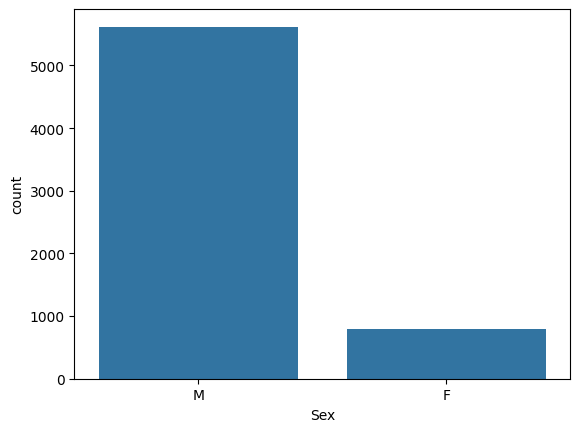

In [228]:
import seaborn as sns

sns.countplot(x='Sex', data=df)


<Axes: xlabel='Year'>

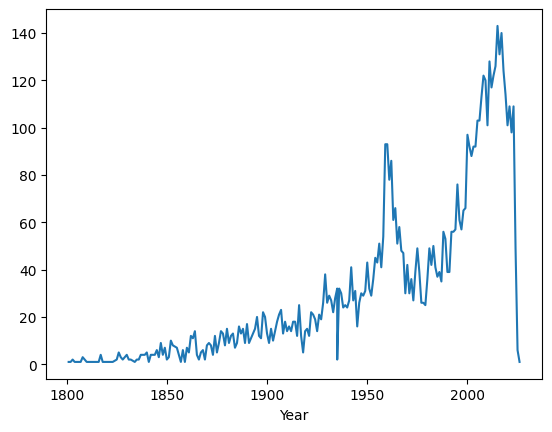

In [229]:
df_count[df_count.index > 1800].plot()

<Axes: xlabel='Age', ylabel='Count'>

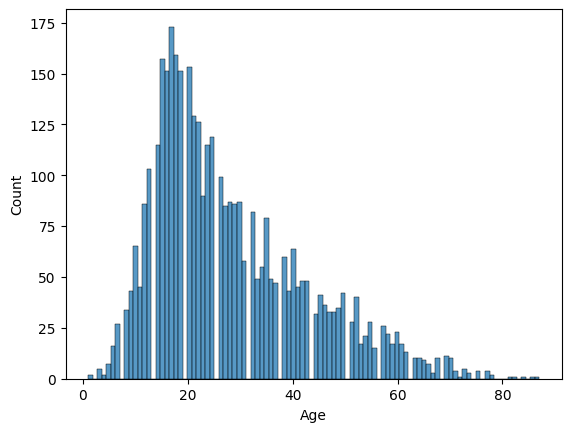

In [230]:
sns.histplot(df['Age'], bins=100) 

<Axes: xlabel='count', ylabel='Activity'>

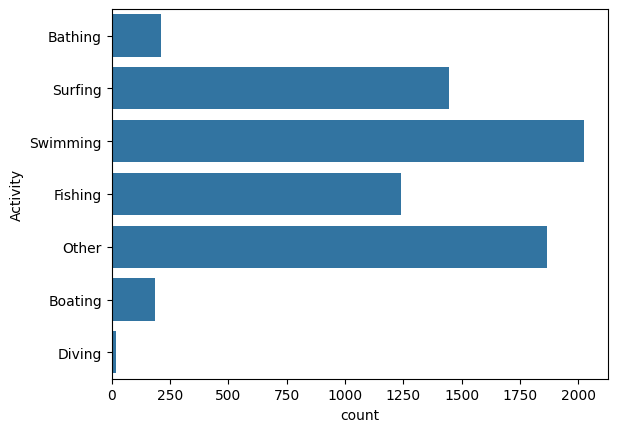

In [231]:
sns.countplot(df['Activity']) 

<Axes: xlabel='Country'>

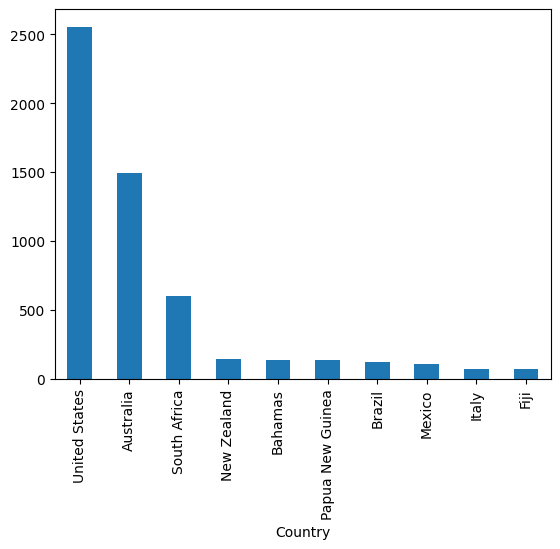

In [232]:
df['Country'].value_counts().head(10).plot(kind='bar')

<Axes: xlabel='Activity', ylabel='Age'>

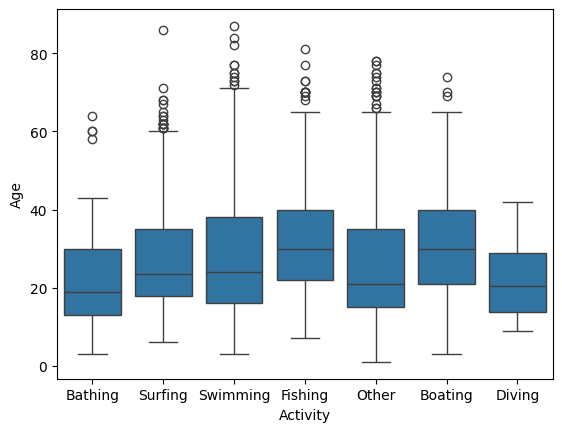

In [233]:
sns.boxplot(x='Activity', y='Age', data=df)

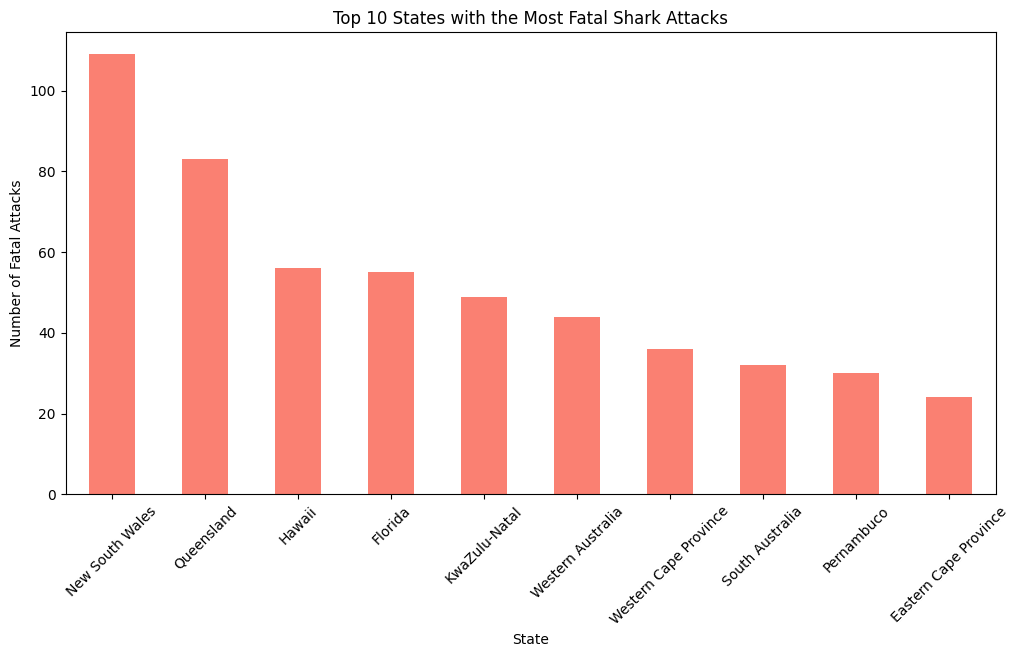

In [237]:

import matplotlib.pyplot as plt

attacks_by_country = df['Country'].value_counts()
fatal_attacks_by_country = df[df['Fatal Y/N'] == 'Y']['Country'].value_counts()
fatal_percentage_by_country = fatal_attacks_by_country / attacks_by_country * 100
fatal_attacks_by_state = df[df['Fatal Y/N'] == 'Y']['State'].value_counts()

# # Plot the number of attacks by country
# plt.figure(figsize=(12, 6))
# attacks_by_country.head(10).plot(kind='bar', color='skyblue')
# plt.title("Top 10 Countries with the Most Shark Attacks")
# plt.xlabel('Country')
# plt.ylabel('Number of Attacks')
# plt.xticks(rotation=45)
# plt.show()

# # Plot the number of fatal attacks by country
# plt.figure(figsize=(12, 6))
# fatal_attacks_by_country.head(10).plot(kind='bar', color='red')
# plt.title("Top 10 Countries with the Most Fatal Shark Attacks")
# plt.xlabel('Country')
# plt.ylabel('Number of Fatal Attacks')
# plt.xticks(rotation=45)
# plt.show()

# # Plot the fatal attack percentage by country
# plt.figure(figsize=(12, 6))
# fatal_percentage_by_country.head(10).plot(kind='bar', color='orange')
# plt.title("Top 10 Countries with the Highest Percentage of Fatal Shark Attacks")
# plt.xlabel('Country')
# plt.ylabel('Fatal Attack Percentage')
# plt.xticks(rotation=45)
# plt.show()

# Plot the fatal attacks by state
plt.figure(figsize=(12, 6))
fatal_attacks_by_state.head(10).plot(kind='bar', color='salmon')
plt.title("Top 10 States with the Most Fatal Shark Attacks")
plt.xlabel('State')
plt.ylabel('Number of Fatal Attacks')
plt.xticks(rotation=45)
plt.show()